In [122]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from skimage import exposure

digits = load_digits()

In [123]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [124]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


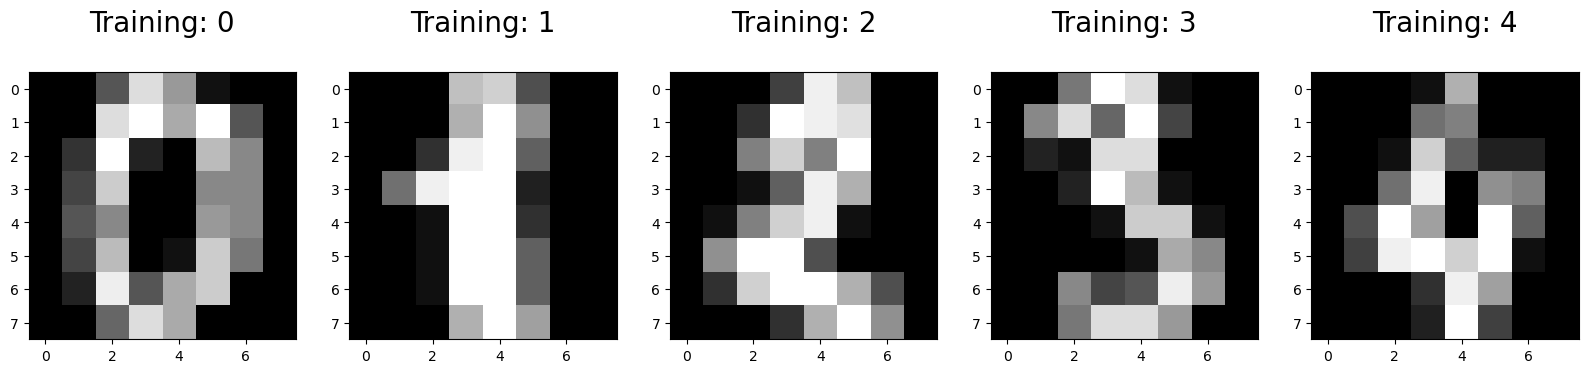

In [125]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

## Splitting the data into training and test sets.

In [126]:
# In this section we will put the digits.data in feature variable X and digits.target in target variable y.
# X will be the images pixe arrays while y will be the digits 0,..,9.
# The purpose of this is to train the machine learning model on a predefined set of labelled images so that it is capable to predict the the number shown in the test images.

X, y = digits.data, digits.target

In [127]:
# Reshape the images to 2D arrays. There will be 1797 images, each will be a 8x8 matrix of pixels.
X = X.reshape(-1, 8, 8)
X

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [128]:
# Preprocess the images
X_preprocessed = []

for image in X:
    # Apply contrast stretching
    p2, p98 = np.percentile(image, (2, 98))
    img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

    # Flatten the preprocessed image
    img_flat = img_rescale.flatten()
    X_preprocessed.append(img_flat)

In [129]:
# turning the preprocessed values into a Numpy array.
X_preprocessed = np.array(X_preprocessed)

In [130]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [131]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_split=2,random_state=42)

In [132]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [133]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [134]:
# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Model Accuracy is: {:.6f}'.format(accuracy))
print('Model Precision is: {:.6f}'.format(precision))
print('Model Recall is: {:.6f}'.format(recall))
print('Model F1 Score is: {:.6f}'.format(f1))

Model Accuracy is: 0.980556
Model Precision is: 0.981959
Model Recall is: 0.980269
Model F1 Score is: 0.980988


I will attempt to to tune the the max_depth parameter to determine at what depth would give the best model metrics such as Accuracy, Precision, Recall and F1 Score.

## max_depth = 10

In [135]:
# Attempting to tune the max_depth parameter by trying different values

# Create a Random Forest Classifier with max_depth set to 10
rf_classifier_10 = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=2,random_state=42)

# Train the classifier
rf_classifier_10.fit(X_train, y_train)

# Make predictions on the test set
y_pred_10 = rf_classifier_10.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred_10)
precision = precision_score(y_test, y_pred_10, average='macro')
recall = recall_score(y_test, y_pred_10, average='macro')
f1 = f1_score(y_test, y_pred_10, average='macro')

print('Max_depth = 10')
print('Model Accuracy is: {:.6f}'.format(accuracy))
print('Model Precision is: {:.6f}'.format(precision))
print('Model Recall is: {:.6f}'.format(recall))
print('Model F1 Score is: {:.6f}'.format(f1))

Max_depth = 10
Model Accuracy is: 0.983333
Model Precision is: 0.985407
Model Recall is: 0.983603
Model F1 Score is: 0.984438


## max_depth = 20

In [136]:
# Attempting to tune the max_depth parameter by trying different values

# Create a Random Forest Classifier with max_depth set to 20
rf_classifier_20 = RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_split=2,random_state=42)

# Train the classifier
rf_classifier_20.fit(X_train, y_train)

# Make predictions on the test set
y_pred_20 = rf_classifier_20.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred_20)
precision = precision_score(y_test, y_pred_20, average='macro')
recall = recall_score(y_test, y_pred_20, average='macro')
f1 = f1_score(y_test, y_pred_20, average='macro')

print('Max_depth = 20')
print('Model Accuracy is: {:.6f}'.format(accuracy))
print('Model Precision is: {:.6f}'.format(precision))
print('Model Recall is: {:.6f}'.format(recall))
print('Model F1 Score is: {:.6f}'.format(f1))

Max_depth = 20
Model Accuracy is: 0.980556
Model Precision is: 0.981959
Model Recall is: 0.980269
Model F1 Score is: 0.980988


## max_depth = 30

In [137]:
# Attempting to tune the max_depth parameter by trying different values

# Create a Random Forest Classifier with max_depth set to 30
rf_classifier_30 = RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_split=2,random_state=42)

# Train the classifier
rf_classifier_30.fit(X_train, y_train)

# Make predictions on the test set
y_pred_30 = rf_classifier_30.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred_30)
precision = precision_score(y_test, y_pred_30, average='macro')
recall = recall_score(y_test, y_pred_30, average='macro')
f1 = f1_score(y_test, y_pred_30, average='macro')

print('Max_depth = 30')
print('Model Accuracy is: {:.6f}'.format(accuracy))
print('Model Precision is: {:.6f}'.format(precision))
print('Model Recall is: {:.6f}'.format(recall))
print('Model F1 Score is: {:.6f}'.format(f1))

Max_depth = 30
Model Accuracy is: 0.980556
Model Precision is: 0.981959
Model Recall is: 0.980269
Model F1 Score is: 0.980988


## From the 3 tests above, we can see that the max_depth parameter of 10 has the best performance metrics. There is no change in performance metrics when we increase the max_depth parameter from 20 to 30.

## Printing the Confusion Matrix of the Random Forest Model with the best max_depth parameter

In [138]:
rf_classifier_10.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [139]:
y_train

array([6, 0, 0, ..., 2, 7, 1])

In [140]:
y_pred_10

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

Text(0.5, 1.0, 'Development Confusion Matrix of the RF with max_depth=10')

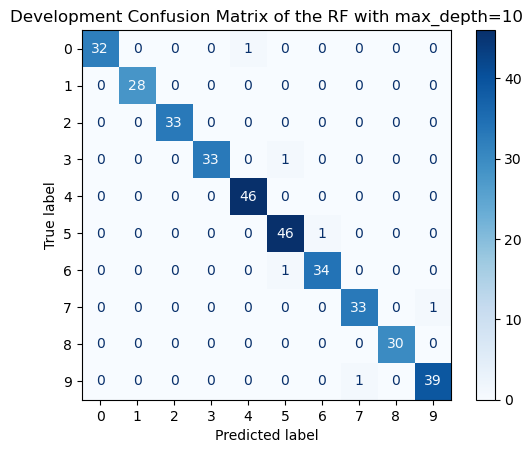

In [141]:

cm = confusion_matrix(y_test, y_pred_10, labels=rf_classifier_10.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_classifier_10.classes_)
disp.plot(cmap='Blues')
plt.title('Development Confusion Matrix of the RF with max_depth=10')

From the above confusion matrix, we can see the model generally performs quite well. There were a few instances in the testing set where the model incorrectly predicted 4 instead of 0, predicted 5 instead of 3 and 6, predicted 6 instead of 5 and predicted 9 instead of 7.